In [14]:
pip install pyentrp

Note: you may need to restart the kernel to use updated packages.


In [3]:
import serial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz , argrelextrema , spectrogram , welch
import biosppy
import biosppy.signals.eda as eda
import neurokit2 as nk
import ledapy
from numpy.lib.stride_tricks import as_strided


In [4]:
# Global variables
Fs = 10

In [5]:
def Serial_configuration() :
    # Configure the serial port
    port = 'COM3'  # Replace with the appropriate COM port for your system
    baud_rate = 9600  # Set the baud rate to match your MC configuration
    data_bits = 8
    parity = serial.PARITY_NONE
    stop_bits = 1
    # Create a serial object
    global ser
    ser = serial.Serial(port, baud_rate, data_bits, parity, stop_bits)

In [6]:
def plot_discrete_data( my_signal , samples_num):
    F_sampling = samples_num  
    time = np.arange( 0 , F_sampling ) * (1/F_sampling) #Time  x-axis
    plt.stem(time , my_signal )  # Discrete


In [7]:
def save_data(a_df, data_list):
    data_to_append = []
    for data in data_list:
        new_panda_data = {
            "Data": data,
            "Data2": '1'
        }
        data_to_append.append(new_panda_data)

    # Concatenate the DataFrame with the new data
    a_df = pd.concat([a_df, pd.DataFrame(data_to_append)], ignore_index=True)
    # Save the DataFrame to an Excel file
    a_df.to_excel('serial_data.xlsx', index=False)

In [8]:
"""
The function take the signal and return the filtered signal
""" 
def apply_low_pass_filter_on_a_signal( order , normalized_cutoff , signal  ):
    fir_coefficients = firwin( order + 1, normalized_cutoff , window='hamming' ) # It return the FIR filter coefficients (bk)
    filtered_signal = np.convolve( signal , fir_coefficients, mode='same')  # 'same' to keep the output length the same
    return filtered_signal    

In [9]:
"""
Moving average filter
""" 
def Moving_avrage_filter( a_data_list , a_seconds , a_samplingFreq ):
    
    l_SCL = np.zeros(len(a_data_list)) # Save Tonic componanat
    l_SCR = np.zeros(len(a_data_list)) # Save phasic componant
    
    l_window = a_seconds * a_samplingFreq # Filter window
    
    for i in range( l_window , len(a_data_list) - l_window ):
        l_medium_filter_out = a_data_list[ i-l_window : i+l_window ]
        l_SCL[i] = np.median(l_medium_filter_out) # Make a medium filter
        l_SCR[i] = a_data_list[i] - l_SCL[i]
    return l_SCL , l_SCR


In [10]:
"""
Min_Max normalization
Perform Min-Max Normalization on a list of data.

Parameters:
- data (list): The input list of numerical values.

Returns:
- normalized_data (list): The list of normalized values.
"""
def min_max_normalization(a_data):

    l_min_val = min(a_data)
    l_max_val = max(a_data)

    l_normalized_data = [(l_x - l_min_val) / (l_max_val - l_min_val) for l_x in a_data]

    return l_normalized_data


In [11]:
def Processing_signal( a_signal ):
        processed_signal = apply_low_pass_filter_on_a_signal( 50 , 1/Fs , a_signal ) # Filtering signal
#         processed_signal = min_max_normalization(processed_signal)  # Normalization
#       processed_signal = eda.eda( a_signal , sampling_rate = Fs)
#       processed_signal = Moving_avrage_filter( a_signal , 4 )
#     onsets , peaks , amp = eda.kbk_scr( a_signal , Fs )
        return processed_signal

start

Data=1583
Data=1593
Data=1595
Data=1601
Data=1598
Data=1599
Data=1597
Data=1599
Data=1603
Data=1609
Data=1611
Data=1614
Data=1604
Data=1599
Data=1595
Data=1600
Data=1600
Data=1604
Data=1608
Data=1606
Data=1607
Data=1603
Data=1603
Data=1596
Data=1594
Data=1602
Data=1600
Data=1596
Data=1592
Data=1599
Data=1593
Data=1591
Data=1589
Data=1594
Data=1590
Data=1596
Data=1595
Data=1596
Data=1591
Data=1595
Data=1589
Data=1589
Data=1589
Data=1595
Data=1597
Data=1595
Data=1592
Data=1598
Data=1590
Data=1593
Data=1593
Data=1591
Data=1595
Data=1589
Data=1593
Data=1598
Data=1594
Data=1591
Data=1595
Data=1593
Data=1591
Data=1596
Data=1599
Data=1605
Data=1601
Data=1601
Data=1593
Data=1591
Data=1593
Data=1597
Data=1601
Data=1599
Data=1601
Data=1600
Data=1603
Data=1598
Data=1595
Data=1598
Data=1603
Data=1603
Data=1597
Data=1605
Data=1603
Data=1604
Data=1597
Data=1597
Data=1601
Data=1598
Data=1602
Data=1601
Data=1609
Data=1602
Data=1605
Data=1598
Data=1598
Data=1603
Data=1601
Data=1611
Data=1606
Dat

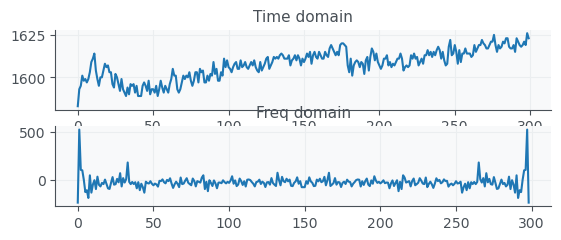

In [33]:
"""
  Read data from sensor 
""" 
def ReadDataFromSensor( a_time_sec ):
    
    # Create an empty DataFrame to store the received data
    panda_data = {
        "Data"  : [0],
        "Data2" : [0]
    }
    df = pd.DataFrame( panda_data )


    # Make the configuration
    Serial_configuration()
    counter = 0
    data_list = np.array([])
    counter = 0;


    print("start\n")
    # Read and store the serial data
    while True:
        if ser.in_waiting > 0:
            # Read Line
            temp =  ser.readline().decode().strip()
            counter = counter + 1

            if( temp == '' ):
                data = 0
            else :
                data = int( temp )

            if( counter >= a_time_sec*Fs ):
                ser.close()
                print('************************')
                data_list = np.append( arr = data_list , values = [data]  )

                # Plot signal
                plt.subplot(4,1,1)
                plt.title("Time domain")
                #plt.ylim(200 , 700)
                plt.plot( data_list )
                plt.subplot(4,1,2)
                plt.title("Freq domain")
                plt.plot(  np.real( ( np.fft.fft(data_list)[1:] ) ) )

#                 #Process signal
#                 process_data_list = Processing_signal( data_list )
#                 print('**********************************')
#                 plt.subplot(4,1,3)
#                 plt.title("After processing")
#                 plt.ylim(0.3 , 1)
#                 plt.plot( process_data_list , 'r')
#                 plt.subplot(4,1,4)
#                 plt.plot(  np.real( ( np.fft.fft(process_data_list)[1:] )  ) , 'r' )

                # Empty the list and counter
                counter = 0
                break
            else :
                data_list = np.append( arr = data_list , values = [data]  )
                print("Data={:d}".format(data))

    # Save the data 
    save_data( df , data_list )
    return data_list 
        
GSR_Read_data = ReadDataFromSensor(30*1)


In [22]:
# Close serial connection
ser.close()

In [12]:
kkkk = GSR_Read_data
# kkkk = apply_low_pass_filter_on_a_signal( 10 , 4/Fs , kkkk ) # Filtering signal
# plt.plot(kkkk[3:-3])

NameError: name 'GSR_Read_data' is not defined

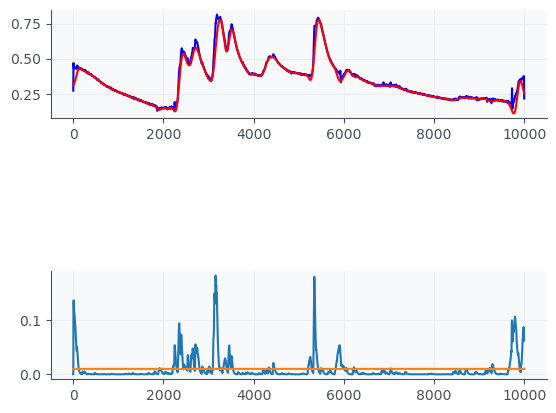

In [16]:
"""
                Not good to Extract onset and offset, so we didn't use it
                
  Make preprocessing       : Applaying FIR Low pass filter of order 50 at cutoff 1.5/Fs
                             Make Min_Max Normalization to the signal
  Extract Phasic and tonic : Using cvxEDA method from neurokit2 package                     
"""
def GSR_preprocessingAndExtractPhasicAndTonic( a_signal , a_plot=True ):
    
    a_signal = min_max_normalization(a_signal) #First make normalization to the signal
    a_signal = apply_low_pass_filter_on_a_signal( 50 , 1.5/Fs , a_signal ) # Make a Low pass filter



    l_eda_tonic_phasic = nk.eda_phasic( a_signal , sampling_rate=Fs , method="cvxEDA"  )


    l_eda_phasic = l_eda_tonic_phasic['EDA_Phasic'].tolist()
    l_eda_tonic = l_eda_tonic_phasic['EDA_Tonic'].tolist()
    
    
    if( a_plot == True ):
        plt.subplot(3,1,1)
        plt.plot(a_signal, 'b')
        plt.subplot(3,1,1)
        plt.plot( l_eda_tonic , 'r' )
        plt.subplot(3,1,3)
        plt.plot( l_eda_phasic )
        plt.subplot(3,1,3)
        plt.plot( [0.01]*len(a_signal) )
        
    return l_eda_tonic , l_eda_phasic   



x = Get_dataFromTextFile('serial_data_1.txt')    
llvll,ggg = GSR_preprocessingAndExtractPhasicAndTonic(x,True)


array([1., 2., 8., 5., 2., 3., 4., 4., 1., 4., 0.])

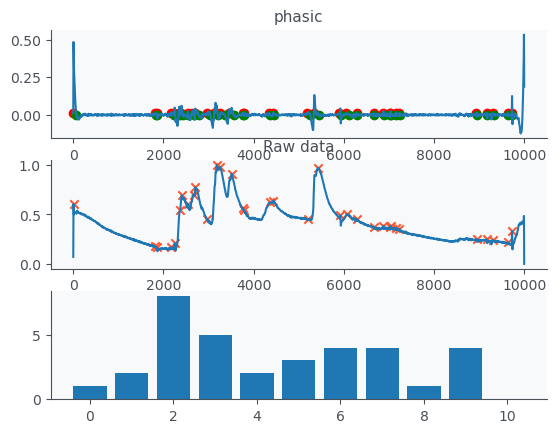

In [17]:
"""
                      GSR_ExtractPhasicTonic_OnsetAndOffset
                      
  Make preprocessing       : Applaying FIR Low pass filter of order 50 at cutoff 1.5/Fs
                             Make Min_Max Normalization to the signal
 Extract Phasic and tonic  : Using neurokit method
 Extract onset and offset  : from pahsic componat of signal using threshold 0.01 of onset
                             and 0 of offset
 Extract peaks             : from cleaned data, it will extract peaks between each couple onset and offset                           
 return                    : It returns phasic, tonic, onset_offset couple and peaks
                            
"""
def GSR_ExtractPhasicTonic_OnsetAndOffset_Peaks( a_gsr_sig , a_plot=True ):
    
    l_sig =  apply_low_pass_filter_on_a_signal( 50 , 1.5/Fs , a_gsr_sig ) # Make a Low pass filter
    l_sig = min_max_normalization(l_sig) # Make Normalization

    # --- Get phasic and tonic componants ---
    l_process_sig , l_process_info = nk.eda_process(  l_sig , sampling_rate=Fs , method='neurokit' )
    l_tonic  = l_process_sig['EDA_Tonic'].tolist()   # Get tonic  componant and change it to a list
    l_phasic = l_process_sig['EDA_Phasic'].tolist()  # Get phasic componant and change it to a list
    
    # cvxEDA method gives a phasic compnant from 0 to 1, no offset in it, so we didn't use it
#     l_eda_tonic_phasic = nk.eda_phasic( l_sig , sampling_rate=Fs , method="cvxEDA"  )
#     l_phasic = l_eda_tonic_phasic['EDA_Phasic'].tolist()
#     l_tonic = l_eda_tonic_phasic['EDA_Tonic'].tolist()
    
    l_phasic = l_phasic[0:] # Slice phasic componant
    l_sig = l_sig[0:]

    # --- Calculate onsets and offsets ---
    l_onset_threshold = 0.01
    l_offset_threshold=0

    # Initialize onset and offset array
    l_onset  = np.zeros( len(l_phasic) )
    l_offset = np.zeros( len(l_phasic) )

    # Onset
    for i in range( len(l_phasic) ): # Get all points that is larger than onset threshold 
        if( l_phasic[i] > l_onset_threshold ):
            l_onset[i] = i
        else:
            l_onset[i] = 0

    # Offset
    for i in range( len(l_phasic) ): # Get all points that is smaller than offset threshold 
        if( l_phasic[i] <= l_offset_threshold ):
            l_offset[i] = i
        else:
            l_offset[i] = 0

    # The next step is to couple onset and offset with each other
    l_index = 0
    l_token = 1
    l_len = max( len(l_offset) , len(l_onset) )


    l_onset_offset_couple = []  # An array that will save the onset and offset couples

    for i in range( l_len-1 ):
        if( l_token == 1 ): 
            while( l_index < len(l_onset) and l_onset[l_index] == 0 ):
                l_index = l_index + 1
    
            # A start of an onset
            l_onset_index = l_index 
            l_token = 0

        if( l_token == 0 ):
            while( l_index < len(l_offset) and l_offset[l_index] == 0 ):
                l_index = l_index + 1
  
            # couple offset with it's onset
            l_offset_index = l_index
            l_token = 1
            # Cheack if it reaches end of list
            if( l_index >= l_len-1 ):
                break  
            else :
                 l_onset_offset_couple.append( [l_onset_index,l_offset_index] ) # append couple
    
    
   
            
    # Separate onset and offset points from each other to draw them
    l_draw_onset = []
    for i in range( len(l_onset_offset_couple) ):
        l_draw_onset.append( l_onset_offset_couple[i][0] )
        
    l_draw_offset = []
    for i in range( len(l_onset_offset_couple) ):
        l_draw_offset.append( l_onset_offset_couple[i][1] )    

    # X_axis of the onset and offsets    
    l_onset_x_axis  = [l_onset_threshold]*len(l_draw_offset) 
    l_offset_x_axis = [l_offset_threshold]*len(l_draw_offset)
        

    # --- Find peaks between each onset and offset ---
    l_interval = [] # Will contain values of samples between onset and offset
    l_peaks = [] # Will contains the peaks for each onset-offset pair
    for i in range( len(l_onset_offset_couple ) ):
        l_j=0
        l_temp = l_onset_offset_couple[i][0] # Get the index of onset point

        while( l_temp < l_onset_offset_couple[i][1] ): # Loop untill reaches the corresponding offset value
            l_interval.append( l_sig[ l_temp ] ) # append the raw signal value which is between onset and offset
            l_temp+=1
        # At this point we reaches the end of onset-offset interval
        l_max_value = max(l_interval) # peak value
        l_peaks.append( [  l_temp-len(l_interval)+l_interval.index(l_max_value) , l_max_value ] ) # append the peaks index and peak value
        l_interval.clear() # Clear the interval list
        
    # Separate index of peak points from peak value in two arrays
    l_draw_peak_index = []
    l_draw_peak_value = []
    for i in range( len(l_peaks) ):
        l_draw_peak_index.append( l_peaks[i][0] ) 
        l_draw_peak_value.append( l_peaks[i][1] ) 
        
    # Draw a histogram
    l_timeForEachSample = 100
    l_draw_histogram = np.zeros( int( len(l_phasic)/(Fs*l_timeForEachSample) ) + 1 )
    for i in range( len(l_draw_peak_index) ):
        l_his_index = int( l_draw_peak_index[i]/(Fs*l_timeForEachSample) ) # Get interval of each sample
        l_draw_histogram[ l_his_index ] += 1 # increment 
        
    # Plot
    if( a_plot == True ):
        plt.subplot(3,1,1)
        plt.title('phasic')
        plt.plot(l_phasic )
        plt.scatter( l_draw_onset , l_onset_x_axis , c='r' , label='onset'   )   # Draw onsets
        plt.scatter( l_draw_offset , l_offset_x_axis , c='g' , label='offset'   ) # Draw offsets
        plt.grid()
        plt.subplot(3,1,2)
        plt.title('Raw data')
        plt.plot(l_sig , label='cleaned signal')
        plt.scatter( l_draw_peak_index , l_draw_peak_value ,c='#FF5733' , marker='x' ) 
        plt.grid()
        plt.subplot(3,1,3 )
        plt.bar( np.arange(0,len(l_draw_histogram) ) , l_draw_histogram)
        plt.grid()

        
    return l_phasic , l_draw_histogram , l_tonic , l_onset_offset_couple , l_peaks     
    
    
x = Get_dataFromTextFile('serial_data_1.txt')        
f , g , _ , _ , _ = GSR_ExtractPhasicTonic_OnsetAndOffset_Peaks(x)    
g

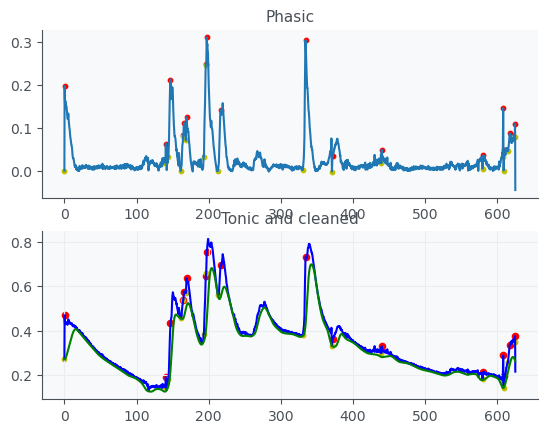

[   6 2248 2352 2634 2650 2708 3137 3156 3467 5347 5952 7037 9292 9730
 9756 9874 9993]
[   0 2239 2305 2578 2637 2694 3093 3144 3403 5286 5932 7028 9273 9719
 9740 9835 9984]


array([   6, 2248, 2352, 2634, 2650, 2708, 3137, 3156, 3467, 5347, 5952,
       7037, 9292, 9730, 9756, 9874, 9993], dtype=int64)

In [18]:
# from biosppy.signals import tools

"""
   This function is used to plot data from Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks functio
"""

def plotpeak( a_orign , a_phasic , a_tonic , a_onset , a_peak):
    #tonic = orign-(pksig-np.min(pksig)) #because negative
    plt.subplot(2,1,1)
    plt.grid()
    plt.title('Phasic')
    l_ts = np.linspace(0, (len(a_phasic)-1)/16,len(a_phasic),endpoint=False)
    plt.plot(l_ts,a_phasic , label='Signal 1')
    plt.scatter(l_ts[a_peak],a_phasic[a_peak],c='r',s=10 , label='Signal 1')
    plt.scatter(l_ts[a_onset],a_phasic[a_onset],c='y',s=10 , label='Signal 1')
    
    plt.subplot(2,1,2)
    plt.grid()
    plt.title('Tonic and cleaned')
    l_ts = np.linspace(0, (len(a_orign)-1)/16,len(a_orign),endpoint=False)
    plt.plot(l_ts,a_orign,c='b')
    plt.plot(l_ts,a_tonic,c='g')
    plt.scatter(l_ts[a_peak] ,a_orign[a_peak],c='r',s=20)
    plt.scatter(l_ts[a_onset] , a_orign[a_onset],c='y',s=10)
    plt.grid()
    plt.show()
    plt.close()
    
    
"""
                      Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime
                      
  Make preprocessing       : Applaying FIR Low pass filter of order 50 at cutoff 1.5/Fs
                             Make Min_Max Normalization to the signal
 Extract Phasic and tonic  : Using ledapy method
 Extract onset and offset  : from pahsic componat of signal using threshold 0.1 
 
 Extract peaks             : from cleaned data, it will extract peaks                      
 return                    : It returns cleaned signal , phasic , tonic , onsets , peaks
                            
"""
def Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( a_signal , a_min_amplitude , a_plot=True ):                
    l_scrs, l_amps, l_ZC, l_pks = [], [], [], []
    a_signal = min_max_normalization(a_signal) #First make normalization to the signal
    a_signal = apply_low_pass_filter_on_a_signal( 50 , 1.5/Fs , a_signal ) # Make a Low pass filter
    
    l_phasicData  = ledapy.runner.getResult( a_signal ,  'phasicdata' , sampling_rate =10 , downsample=1 )
    l_pahsicDriver = ledapy.runner.getResult( a_signal , 'phasicdriver' , sampling_rate =10 , downsample=1 )
    l_tonicData = a_signal - l_phasicData


    # Find zero crossings
    l_zeros = argrelextrema(l_phasicData,np.less)[0]

    l_zeros = np.insert(l_zeros,0,0) # Insert zereo at index zero
    l_zeros = np.insert(l_zeros,len(l_zeros) , len(l_phasicData)-1) # insert the last index in the array at end


    for i in range(0, len(l_zeros) - 1, 1):
        l_scrs += [ l_phasicData[l_zeros[i]:l_zeros[i + 1]+1] ]
        l_aux = l_scrs[-1].max()
        if l_aux > l_phasicData[l_zeros[i]] and l_aux > l_phasicData[l_zeros[i+1]]:
            l_amps += [l_aux-l_phasicData[l_zeros[i]]]
            l_ZC += [l_zeros[i]]
            l_ZC += [l_zeros[i + 1]]
            l_pks += [l_zeros[i] + np.argmax(l_phasicData[l_zeros[i]:l_zeros[i + 1]])]
        elif l_aux == l_phasicData[l_zeros[-1]]:
            l_amps += [l_aux-l_phasicData[l_zeros[-2]]]
            l_ZC += [l_zeros[-2]]
            l_ZC += [l_zeros[-1]]
            l_pks += [l_zeros[-1]]
    if l_amps == []:
        l_ZC += [np.argmin(l_phasicData)]
        l_amps += [np.max(l_phasicData[l_ZC[0]:])-l_phasicData[l_ZC[0]]]
        l_pks += [np.argmax(l_phasicData[l_ZC[0]:])]

    # Find the maximum length of arrays in the list
    l_max_length = max(len(l_scrs) for l_scrs in l_scrs)

    # Pad shorter arrays with zeros to make them the same length
    l_padded_scrs = [np.pad(l_scrs, (0, l_max_length - len(l_scrs)), 'constant') for l_scrs in l_scrs ]

    l_scrs = np.array(l_padded_scrs)
    l_amps = np.array(l_amps)
    l_ZC = np.array(l_ZC)
    l_pks = np.array(l_pks)
    l_onsets = l_ZC[::2]
    l_thr = a_min_amplitude * np.max(l_amps)
    l_arglow = np.where(l_amps<l_thr)
    l_amps = np.delete(l_amps,l_arglow)
    l_pks = np.delete(l_pks,l_arglow)
    l_onsets = np.delete(l_onsets,l_arglow)

    l_risingtimes = l_pks-l_onsets
    l_risingtimes = l_risingtimes/16

    l_pks = l_pks[l_risingtimes > 0.1]
    l_onsets = l_onsets[l_risingtimes > 0.1]
    l_amps = l_amps[l_risingtimes > 0.1]
    
    # Plot
    if( a_plot == True ):
        plotpeak( a_signal , l_phasicData, l_tonicData , l_onsets , l_pks )

        
        
    l_rise_time = l_pks - l_onsets
    return  a_signal , l_phasicData , l_tonicData , l_onsets , l_pks , l_rise_time

    
x = Get_dataFromTextFile('serial_data_1.txt')    
clean_sig , ph , ton , onsets , ppk , raise_time = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime(  np.array(x) , 0.1 )

print(ppk)
print(onsets)
ppk

1

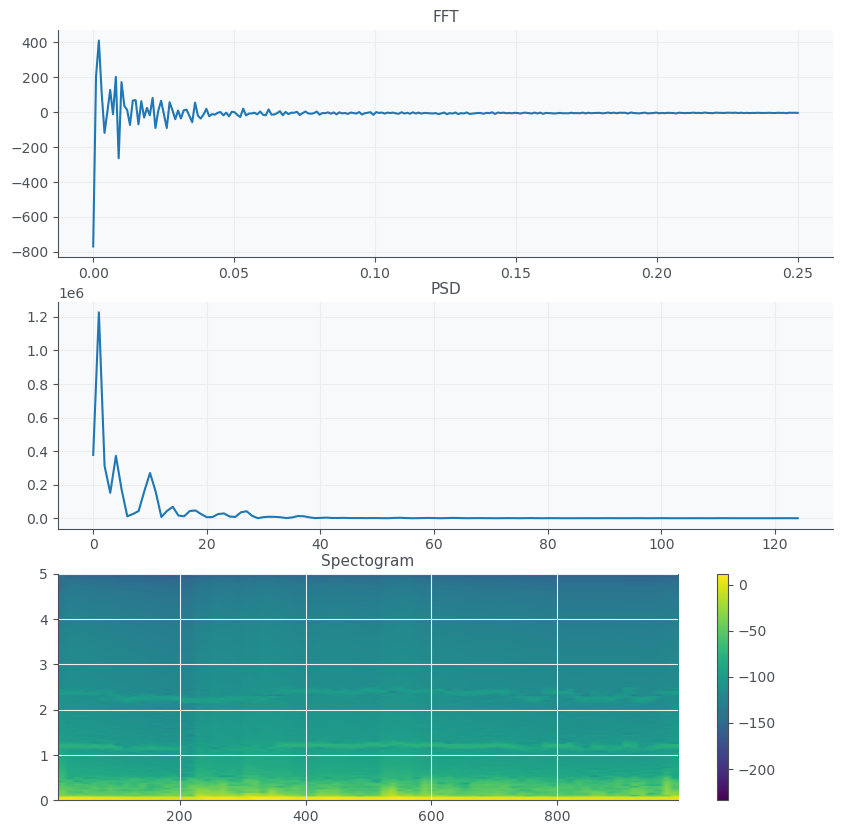

In [42]:
"""
     Extract_frequency_Features
     
     This function Extracts some Freqency features from signal like FFT, PSD and Spectogram
     Return : FFT , PSD and Spectogram_Sxx

"""
def Extract_frequency_Features( a_signal , a_plot=True ):
    
    l_sig = a_signal
    l_sig =  apply_low_pass_filter_on_a_signal( 50 , 0.4/Fs , a_signal ) # Make a Low pass filter
    l_sig = min_max_normalization(l_sig) # Make Normalization
#     l_sig = l_sig[30:-60]

    # Compute Fast Forrirer Transform
    l_fft_sig = np.fft.fft( l_sig )[1:]
    # Compute power specturn denisty of signal
    l_freq, l_psd = welch( a_signal , fs=Fs , nperseg=len(a_signal) )
    # Compute spectrogram
    l_spectogram_freq , l_spectogram_times , l_spectogram_Sxx = spectrogram( np.array(a_signal) , fs=Fs  )
    
    
    # Get freqency from 0 to 0.25HZ, because the signal power is concentrated in this range
    l_fft_sig = l_fft_sig[0 : int(np.round( (0.25/Fs)*(len(l_fft_sig)) )) ]
    l_psd     = l_psd    [0 : int(np.round( (0.25/Fs)*(len(l_psd))     )) ]
    
        
    if( a_plot == True ):
        # Plot FFT signal
        plt.figure(figsize=(10, 10))
        plt.subplot(3,1,1)
        plt.title('FFT')
        l_FFT_x_axis = np.linspace( 0 , 0.25 , len(l_fft_sig)  ) # Get x_axis of FFT graph from 0 to 0.4HZ 
        plt.plot( l_FFT_x_axis , l_fft_sig )

        # Plot PSD signal
        plt.subplot(3,1,2)
        plt.title('PSD')
        plt.plot( l_psd )

        # Plot spectogram
        plt.subplot(3,1,3)
        plt.title('Spectogram')
        plt.specgram( l_sig , Fs=Fs )
        plt.colorbar()
    
    
    return l_fft_sig , l_psd , l_spectogram_Sxx

    
x = Get_dataFromTextFile('serial_data_1.txt')        
Extract_frequency_Features(x) 
1

In [12]:
"""        
   This function takes the signal and split it into many windows to make process on each window
   a_arr     : is the my array
   a_window  : is the window size
   a_overlap : The overlab between ach window
   
   The function returns a two dimention array contains all windows
   Number of windows equal len(a_arr)/(window-overlab)
   Size of eah window equal a_window
   
   Taken from https://github.com/DebasmitaGhose/Stress-Modeling-with-GSR-and-Speech-Sensors/blob/master/GSR.py
"""
def windowed_view( a_arr, a_window_size , a_overlap):
    a_arr = np.asarray(a_arr)
    l_window_step = a_window_size - a_overlap
    l_new_shape = a_arr.shape[:-1] + ((a_arr.shape[-1] - a_overlap) // l_window_step, a_window_size)
    l_new_strides = (a_arr.strides[:-1] + (l_window_step * a_arr.strides[-1],) + a_arr.strides[-1:])
    
    return as_strided( a_arr, shape=l_new_shape, strides=l_new_strides)

In [320]:
"""
   Extract_MeanMaxMinSlopPeakNumPeakMeanPeak25Peak50Peak75
   
   This function takes signal, window size and overlab and make windowing on it
   
   It Extracts some features from GSR signal which are Mean, max, min
   slop, peak number, peak mean, peak 25% percentile, peak 50% percentile and
   peak 75% percentile then returns them 
   
"""

def WindowGSR_Data_And_Extract_MeanMaxMinSlopPeakNumPeakMeanPeak25Peak50Peak75( a_x , a_window_size , a_overlap ):
    
    # Change list to an array
    a_x = np.asarray(a_x)
    a_y = np.linspace(0, len(a_x)-1 , len(a_x) )
 
    
    # Get peaks of signal
    l_clean_sig , _, _, _,l_peak, _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime(  np.array(a_x) , 0.1 , False ) 

    
    # Make windowing
    a_x = windowed_view( a_x , a_window_size , a_overlap )
    a_y = windowed_view( a_y , a_window_size , a_overlap )

    l_mean  = np.mean( a_x , axis=-1 )   # Get mean of data
    l_max   = np.max ( a_x , axis=-1 )   # Get max  of data
    l_min   = np.min ( a_x , axis=-1 )   # Get min  of data
    
#     l_slope  = np.polyfit( a_x , a_y, 1)
    l_slope = ((a_x*a_y).mean(axis=-1) - a_x.mean()*a_y.mean(axis=-1)) / ((a_x**2).mean() - (a_y.mean())**2) # Linear regression slop
    
    l_peaks_numb = []
    l_peaks_mean = []
    l_peaks_25 = []
    l_peaks_50 = []
    l_peaks_75 = []
    
    for i in range( 0 , a_x.shape[0] ): # Loop number of windows times
        l_window_peaks = []  # Empty the list
        for j in range( 0 , len(l_peak) ): # loop on peaks list to know peaks in this window
            if( l_peak[j] in a_y[i] ):
                l_window_peaks.append(l_peak[j])
   
        # After getting all the peaks for this window, we will calculate it's number, mean, Percentile
        if( len(l_window_peaks) > 0 ): # Check if there is a peak
            l_peaks_numb.append( len(l_window_peaks) )
            print( np.mean( l_clean_sig[l_window_peaks] ) )
            l_peaks_mean.append( np.mean( l_clean_sig[l_window_peaks] ) )# Mean of peaks ampitude 
            l_peaks_25.append( np.percentile(l_window_peaks , 25 ) )  # At which value 25% of dataset fall
            l_peaks_50.append( np.percentile(l_window_peaks , 50 ) )  # At which value 50% of dataset fall
            l_peaks_75.append( np.percentile(l_window_peaks , 75 ) )  # At which value 75% of dataset fall 
        else:   # No peaks in this window
            l_peaks_numb.append(0)
            l_peaks_mean.append (0)
            l_peaks_25.append(0)
            l_peaks_50.append(0)
            l_peaks_75.append(0)

    
    return l_mean , l_max , l_min , l_slope , l_peaks_numb , l_peaks_mean , l_peaks_25 , l_peaks_50 , l_peaks_75


In [3]:
x = Get_dataFromTextFile('serial_data_1.txt')        

a , b, c , d , e, f , k , l , p = WindowGSR_Data_And_Extract_MeanMaxMinSlopPeakNumPeakMeanPeak25Peak50Peak75( x  , 1000 , 0 )
a.shape

In [15]:
"""
   Read a file
"""

def Get_dataFromTextFile( a_file_name ):
    # Open the file
    l_file_path = a_file_name  # Provide the path to your text file
    l_x = []

    with open(l_file_path, 'r') as file:
        # Read each line in the file
        for line in file:
            # Remove leading/trailing whitespaces and split if there are commas
            line_data = line.strip().split(',')

            # Convert each non-empty item in the line to a float and add to the data list
            for item in line_data:
                if item.strip():  # Check if the item is not an empty string
                    l_x.append(float(item))
    return l_x    

In [14]:
"""
Write a list in a text file
"""
def Write_listInFile( a_file_name , a_list ):
    # Specify the file path where you want to save the data
    file_path = a_file_name
    # Open the file in write mode and write each number in the list to a separate line
    with open(file_path, 'w') as file:
        for number in a_list:
            file.write(str(number) + '\n')

# Write_listInFile( 'aaa.txt' , [1,2,3] )

In [2]:
# # Initialize empty arrays to store CDA.SCR-Onset and CDA.SCR-Amplitude
# onset_values = []
# amplitude_values = []

# # Open the text file containing the data
# file_path = 'output_data_1_scrlist.txt'  # Specify the path to your text file
# with open(file_path, 'r') as file:
#     # Skip the header line
#     next(file)
#     # Read each line in the file
#     for line in file:
#         # Check if the line is not empty
#         if line.strip():  # Check if the line is not only whitespace
#             # Split the line by whitespace to separate CDA.SCR-Onset and CDA.SCR-Amplitude
#             onset, amplitude = line.split()
#             # Convert the values to float and append them to the respective arrays
#             onset_values.append(float(onset))
#             amplitude_values.append(float(amplitude))

# # Print the extracted values (optional)
# print("CDA.SCR-Onset values:", onset_values)
# print("CDA.SCR-Amplitude values:", amplitude_values)

# for i in range( len(onset_values) ):
#     onset_values[i] = onset_values[i]*10

# # plt.plot(onset_values , amplitude_values  ,  color='none' , marker='o' , linestyle='dashed' , 
# #          linewidth=2 , markersize = 6 , markerfacecolor='blue' , markeredgecolor='blue'   )
       
# # plt.grid()
# # plt.show()

In [3]:
# # Testing neurokit2 Library
# nk_sig =  apply_low_pass_filter_on_a_signal( 50 , 1.5/Fs , x ) # Make a Low pass filter
# nk_sig = min_max_normalization(nk_sig)

# nk_proocess_sig , nk_process_info = nk.eda_process(  nk_sig , sampling_rate=Fs )
# nk_process_raw = nk_proocess_sig['EDA_Raw'].tolist()
# nk_process_clean = nk_proocess_sig['EDA_Clean'].tolist()
# nk_process_tonic = nk_proocess_sig['EDA_Tonic'].tolist()
# nk_process_phasic = nk_proocess_sig['EDA_Phasic'].tolist()
# # nk_process_onset = nk_proocess_sig['SCR_Onsets'].tolist()
# # nk_process_peaks = nk_proocess_sig['SCR_Peaks'].tolist()
# # nk_process_hight = nk_proocess_sig['SCR_Height'].tolist()
# # nk_process_amp = nk_proocess_sig['SCR_Amplitude'].tolist()
# # nk_process_riseTime = nk_proocess_sig['SCR_RiseTime'].tolist()
# # nk_process_recovery = nk_proocess_sig['SCR_Recovery'].tolist()

# # nk_process_raw = nk_sig
# # nk_process_clean = nk_sig
# # nk_process_tonic , nk_process_phasic = nk.eda_phasic( nk_sig , sampling_rate=Fs )
# # info , signal = nk.eda_peaks( nk_process_raw , sampling_rate=Fs)

# # reults = nk.eda_sympathetic( nk_sig , sampling_rate=10, method='posada', show=True)
# # print( nk.eda_autocor( nk_clean_sig , sampling_rate=Fs ) )
# # print(reults)
# # nk_sig = min_max_normalization( nk_sig )
# # nk_phasic = nk.eda_phasic( nk_sig , sampling_rate=Fs , method='cvxeda' )
# # nk_sig = nk.eda_eventrelated(nk_phasic )

# plt.subplot(2,1,1)
# plt.plot( nk_process_clean[2000:3000] , 'r')
# plt.subplot(2,1,1)
# plt.plot(nk_process_tonic[2000:3000] ,'b')
# plt.subplot(2,1,2)
# plt.plot(nk_process_phasic[2000:3000] , 'b')

# print( type(nk_process_onset) )

# draw_onset_sc =[]
# draw_onset_scr=[]
# for i in range(10000):
#     draw_onset_sc.append ( nk_process_clean[i] *nk_process_onset[i] )
#     draw_onset_scr.append( nk_process_phasic[i]*nk_process_onset[i] )
        
# plt.subplot(2,1,1)
# plt.plot( draw_onset_sc[2000:3000]  ,  color='none' , marker='x' , linestyle='dashed' , 
#          linewidth=2 , markersize = 6 , markerfacecolor='red' , markeredgecolor='red'   )

# plt.subplot(2,1,2)
# plt.plot( draw_onset_scr[2000:3000]  ,  color='none' , marker='x' , linestyle='dashed' , 
#          linewidth=2 , markersize = 6 , markerfacecolor='red' , markeredgecolor='red'   )